🦜 Uncomment the following code for the [TidyTuesday Bird Bath dataset](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-08-31).🦉

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df_birdbath = read_csv(
    'https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-08-31/bird_baths.csv?raw=true',
    col_types = cols()
)

Each row represents the number of times a type of bird was observed at a bird bath in the survey year.

We want to just work with the most numerous birds for baths that have been categorized as "Urban" or "Rural."

Find the top fifteen bird types by total `bird_count` after filtering out baths where `urban_rural` category is not provided. Capture this vector with a variable called `top15_bird_types`. 

Hint: remember `pull` and `slice_max` 

In [3]:
top15_bird_types = df_birdbath %>% 
    filter(!is.na(urban_rural)) %>%
    group_by(bird_type) %>%
    summarize(bird_sum = sum(bird_count)) %>%
    slice_max(bird_sum, n = 15) %>%
    pull(bird_type)

top15_bird_types

[1] "Noisy Miner"        "Australian Magpie"  "Rainbow Lorikeet"  
 [4] "Red Wattlebird"     "Superb Fairy-wren"  "Magpie-lark"       
 [7] "Pied Currawong"     "Crimson Rosella"    "Eastern Spinebill" 
[10] "Spotted Dove"       "Lewin's Honeyeater" "Satin Bowerbird"   
[13] "Crested Pigeon"     "Grey Fantail"       "Red-browed Finch"

1. Create a table of just the top birds using the vector of top 15 bird types to filter. Exclude rows with `NA` vlues for `urban_rural`.
1. Group by `bird_type` and `urban_rural` and find the mean `bird_count` for each group.
1. Sort the factor levels for `bird_type` by `bird_count` value at `Rural` baths.
1. Capture the output of these operations under a new variable.

Your final table will have three columns: 1) `bird_type`, 2) `urban_rural` and 3) `mean_bird_count`

In [10]:
df_mean_bird_count = df_birdbath %>%
    filter(bird_type %in% top15_bird_types, !is.na(urban_rural)) %>%
    group_by(bird_type, urban_rural) %>%
    summarize(mean_count = mean(bird_count), .groups = 'drop') %>%
    arrange(urban_rural, mean_count) %>%
    mutate(bird_type = bird_type %>% fct_inorder)
    
df_mean_bird_count %>% head

bird_type,urban_rural,mean_count
<fct>,<chr>,<dbl>
Spotted Dove,Rural,0.03741497
Crested Pigeon,Rural,0.09523810
Pied Currawong,Rural,0.10884354
Magpie-lark,Rural,0.11224490
Red Wattlebird,Rural,0.11904762
Rainbow Lorikeet,Rural,0.13605442


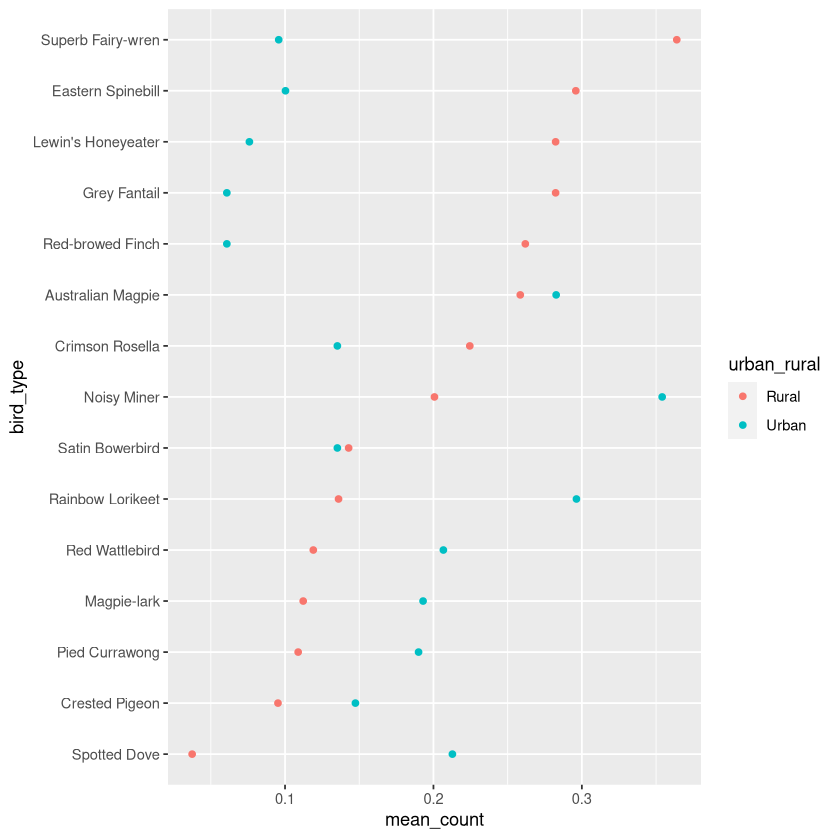

In [9]:
p = ggplot(df_mean_bird_count, aes(x = mean_count, y = bird_type, color = urban_rural))

p = p + geom_point()

p

Make a "Urban"/"Rural" [Cleveland dot chart](https://uc-r.github.io/public/images/visual/cleveland-dotplots/unnamed-chunk-10-1.png) figure with your new table. 

If we want to add "segments" to our dot chart, we need to re-shape our data into "wide" format. Specifically we want to have "Urban" and "Rural" as **columns** instead of **values**.

Use `pivot_wider` to make this wide table, capture it, and use `geom_segment` in combination with your wide table to add segments to your Cleveland dot chart from above 👆.

bird_type,Rural,Urban
<fct>,<dbl>,<dbl>
Spotted Dove,0.03741497,0.2127660
Crested Pigeon,0.09523810,0.1474164
Pied Currawong,0.10884354,0.1899696
Magpie-lark,0.11224490,0.1930091
Red Wattlebird,0.11904762,0.2066869
Rainbow Lorikeet,0.13605442,0.2963526


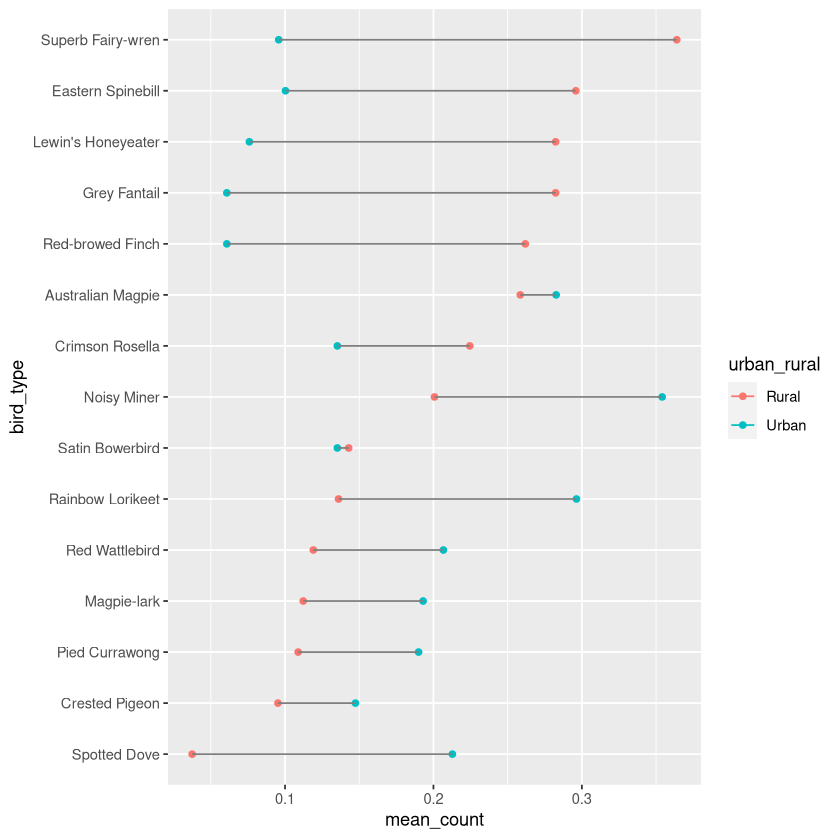

In [18]:
df_wide_mean_bird_count = df_mean_bird_count %>%
    pivot_wider(names_from = urban_rural, values_from = mean_count)

df_wide_mean_bird_count %>% head

p = ggplot(df_mean_bird_count, aes(x = mean_count, y = bird_type, color = urban_rural))

p = p + geom_point()

p = p + geom_segment(data = df_wide_mean_bird_count, aes(x = Urban, xend=Rural, y = bird_type, yend = bird_type, color = NA))

p

(Uncomment the code and make the cell below markdown to see my solution.)

![](https://github.com/chuckpr/BIOS512/blob/main/in-class-exercises/12/12_01_pivot_chart.png?raw=true)